# Reading The dataset

In [1]:
# Reading Dataset from text file as a data frame with column names
import pandas as pd
ILP = pd.read_csv('D:/PGA/Exam/IndianLiverPatientData.txt', delimiter="\t", header = None,
                  names=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase",
                         "Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens"
                         ,"Albumin","Albumin_and_Globulin_Ratio","Class"])
# Looking into head of the data
ILP.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


# EDA

In [2]:
# Describing the dataset
ILP.describe(include = "all")

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
count,583.000000,563,583.000000,583.000000,583.000000,583.000000,583.000000,568.000000,583.000000,579.000000,583
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483979,3.141852,0.947064,NaN
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.084039,0.795519,0.319592,NaN
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,NaN
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,NaN
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,NaN
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,NaN


In [7]:
# Checking for the type of the variables
ILP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 583
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        563 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                568 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Class                         583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 54.7+ KB


## Univariant Analysis

In [3]:
# Making Histograms of numerical variables to check for the skewness and normality of variables
num_columns = [col for col in ILP.columns.values if ILP[col].dtype != 'object']
num_features = ILP[num_columns]
num_features.hist(bins=50,figsize=(11,11));

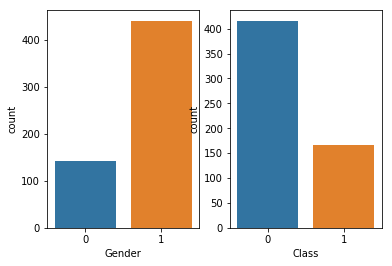

In [11]:
# Exploring Categorical Var
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax =plt.subplots(1,2)
sns.countplot(ILP['Class'], ax=ax[1])
sns.countplot(ILP['Gender'], ax=ax[0])

## Bivariant Analysis

In [10]:
# Checking Relationship Between Categorical and Categorical var using Chi-Square test
crosstab = pd.crosstab(ILP['Gender'], ILP['Class'])
crosstab
from scipy import stats
stats.chi2_contingency(crosstab)

(3.2213231383715644,
 0.07268485603961235,
 1,
 array([[100.88809947,  41.11190053],
        [299.11190053, 121.88809947]]))

In [11]:
# Checking Relationship between numerical and Categorical var using Annova
# By checking each num var with annova we found each var is important for building model
import statsmodels.api as sm
from statsmodels.formula.api import ols
moore_lm = ols('Albumin_and_Globulin_Ratio ~ Class', data=ILP).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

             sum_sq     df         F   PR(>F)
Class      1.571068    1.0  15.77483  0.00008
Residual  57.465341  577.0       NaN      NaN


C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


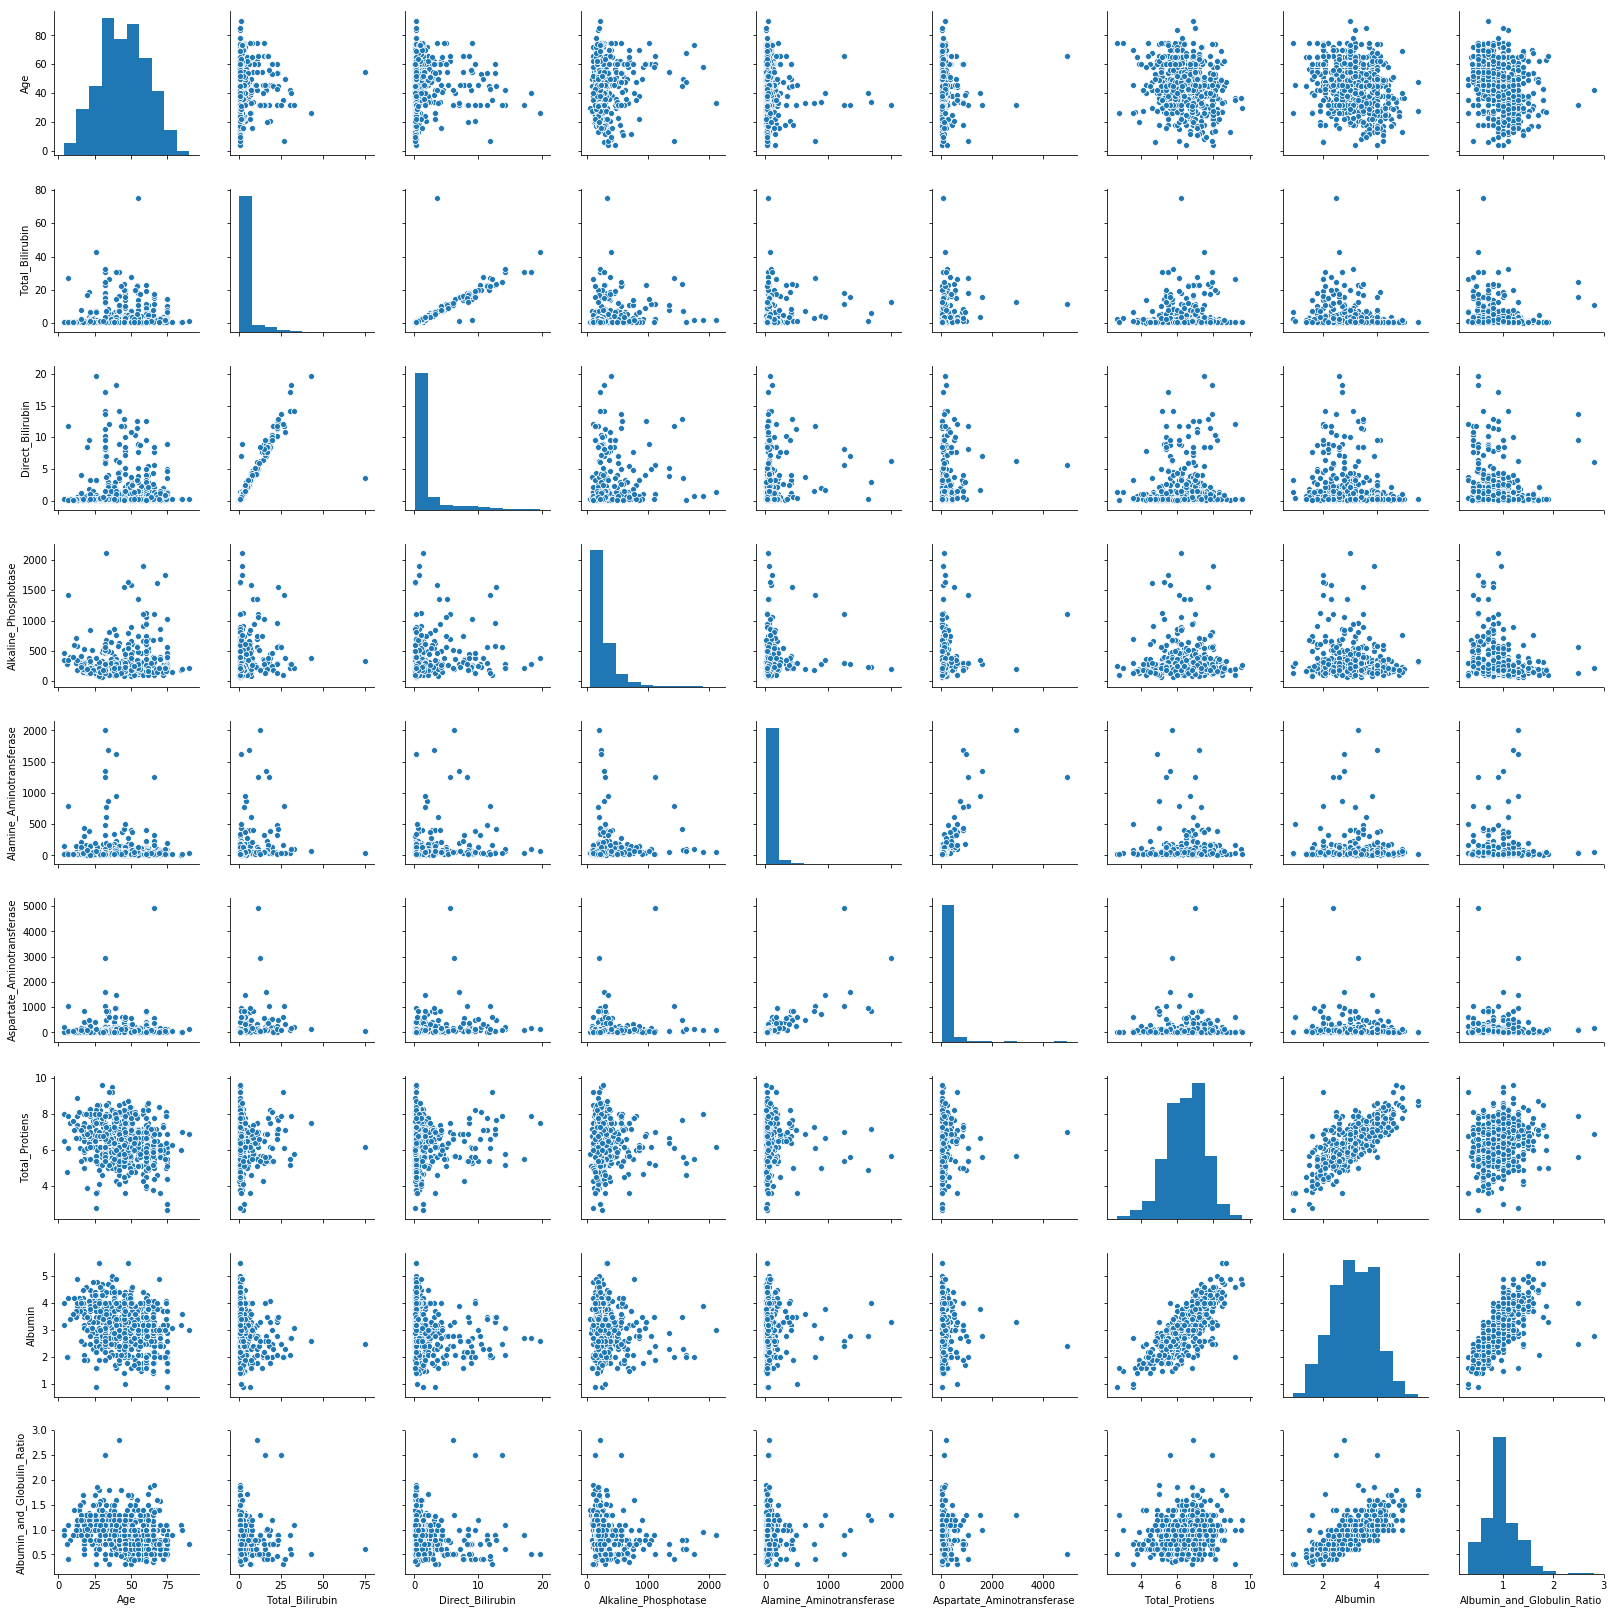

In [12]:
# Visualizing Relationship Among x variables
import seaborn as sns
sns.pairplot(ILP)

## Cleaning

In [4]:
# Checking for the missing values 
ILP.isna().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

In [5]:
# Imputting Missing Values in numerical values
from scipy import interpolate
ILP = ILP.interpolate(method='linear', axis=0)

In [6]:
# Imputting Missing Values in categorical values
from sklearn_pandas import CategoricalImputer
imputer=CategoricalImputer(strategy='most_frequent')
imputer.fit(ILP.Gender)
ILP.Gender = imputer.transform(ILP.Gender)

In [7]:
# Now We can see there are no missing value
ILP.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

## Label Encoding 

In [8]:
#T o Check correaltion  we need to do label encoding on Class
cat_columns = [col for col in ILP.columns.values if ILP[col].dtype == 'object']
ILP[cat_columns] = ILP[cat_columns].astype("category")
ILP['Class'] = ILP['Class'].cat.codes
ILP['Gender'] = ILP['Gender'].cat.codes

## Checking Correlation

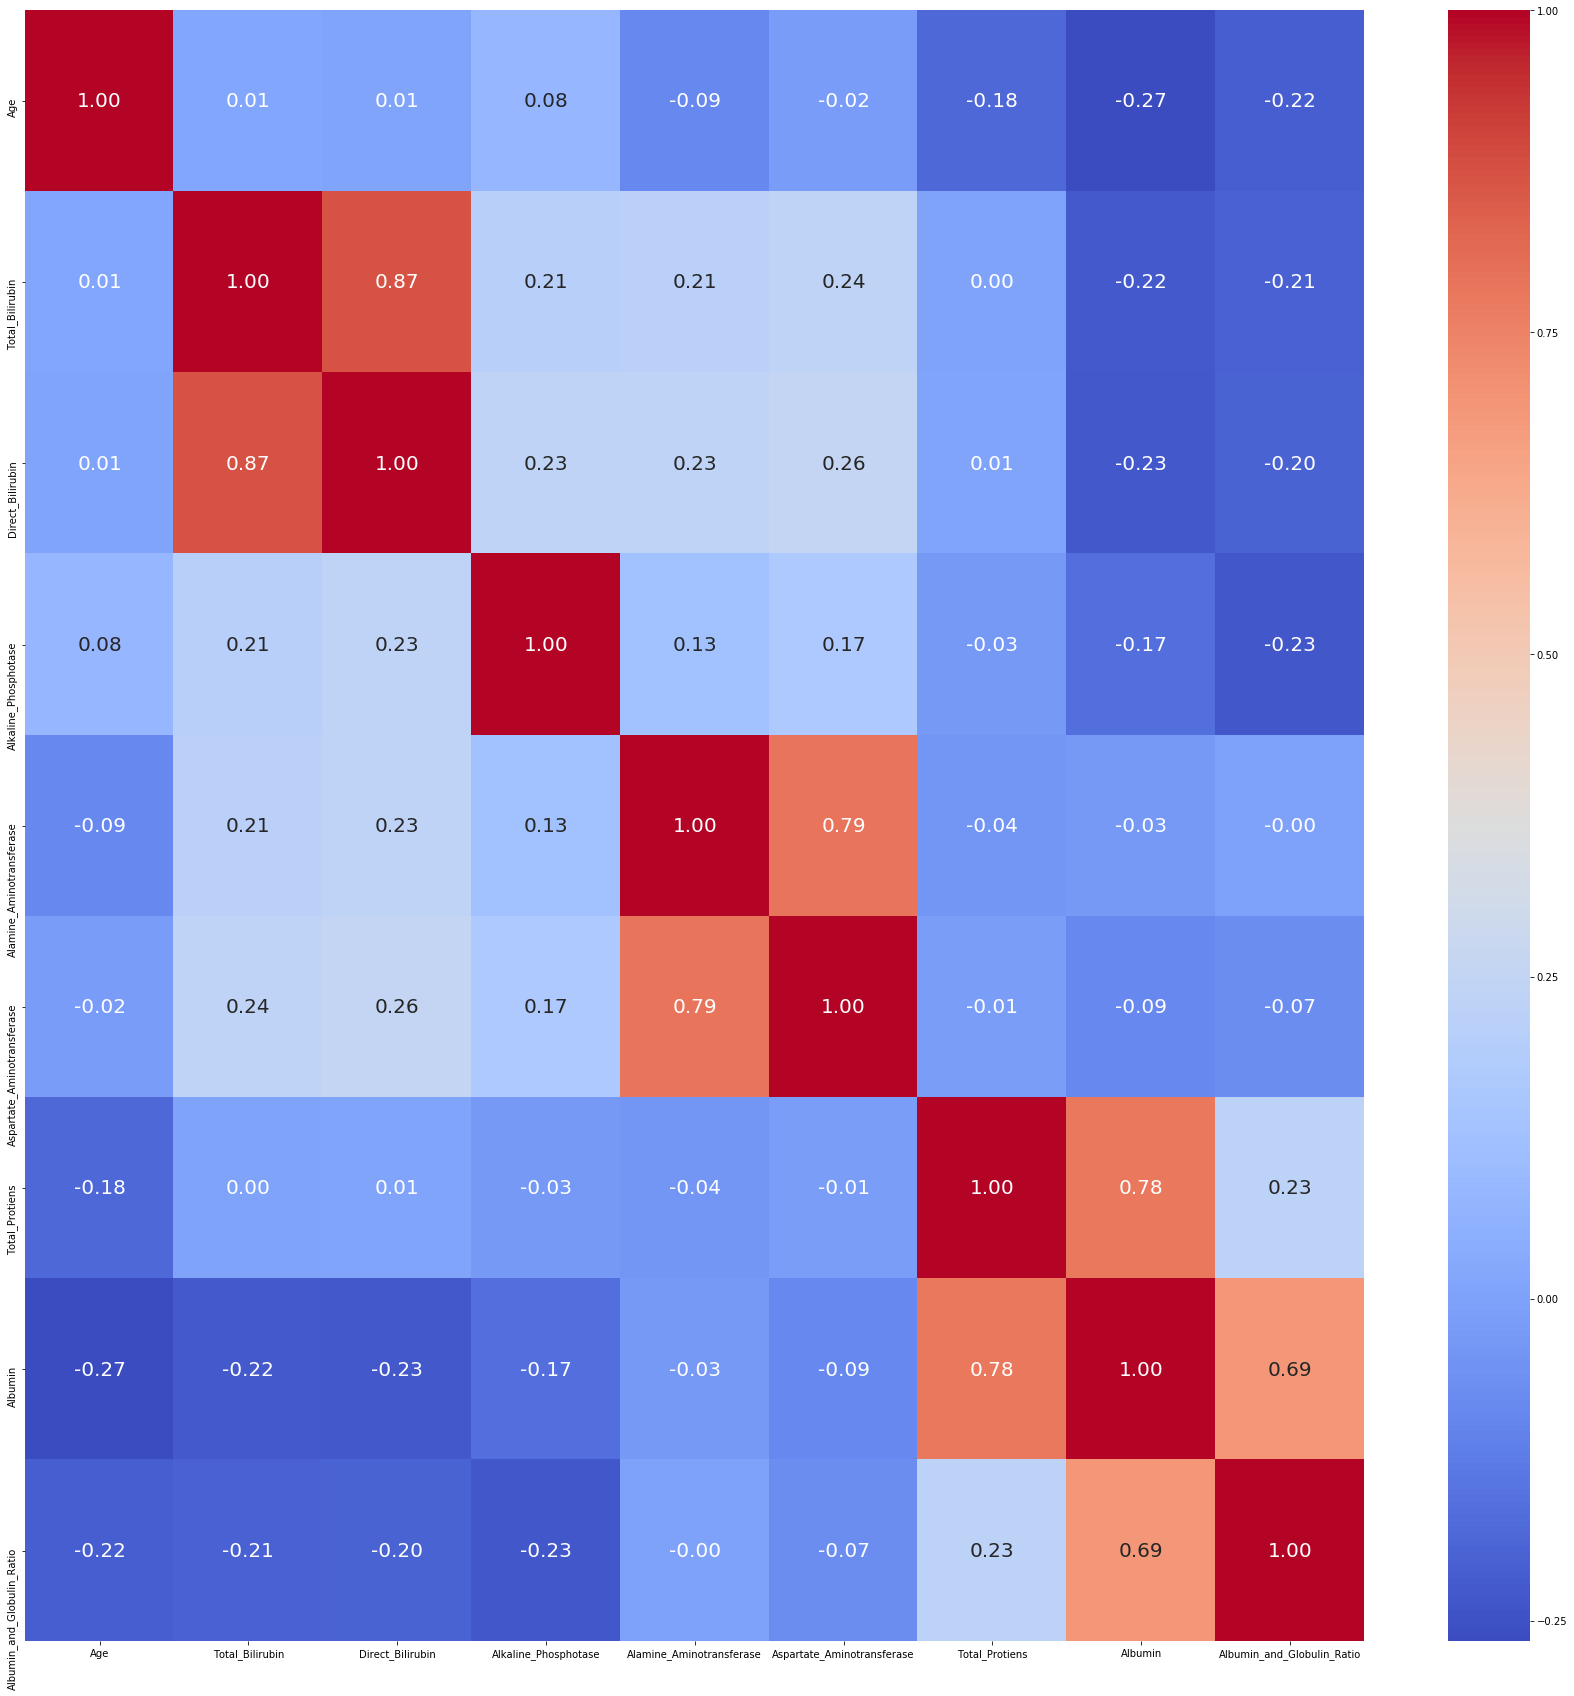

In [19]:
# Checking correlation using heat map
import seaborn as sns
import matplotlib.pyplot as plt
corr = ILP.corr()
plt.figure(figsize = (30, 30))
sns.heatmap(corr, fmt = '.2f', annot= True, annot_kws={'size':20}, cmap = "coolwarm")

# Upsamplling

In [9]:
# As the ratio between yes and No in Class variable is very low we need to do upsampling of the data
from sklearn.utils import resample
# Separate majority and minority classes
major = ILP[ILP.Class==0]
minor = ILP[ILP.Class==1]
# Upsample minority class
minority_upsampled = resample(minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=416,    # to match majority class
                                 random_state=1) # reproducible results
# Combine majority class with upsampled minority class
ILP_upsampled = pd.concat([major, minority_upsampled])
 # Display new class counts
ILP_upsampled.Class.value_counts()

1    416
0    416
Name: Class, dtype: int64

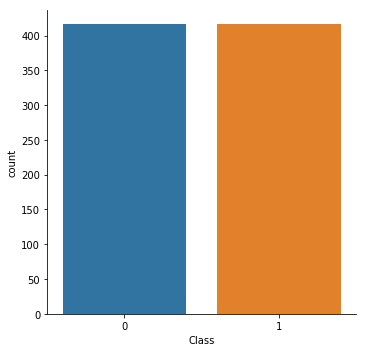

In [12]:
#Checikng for data balancing
sns.catplot(x="Class", kind="count", data=ILP_upsampled);

# Splitting 

In [13]:
# splitting into x and y
y = ILP_upsampled['Class'] 
x = ILP_upsampled.drop(['Class'], axis = 1)

In [14]:
# spliting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

# Building Logistic Model

In [15]:
#bulding a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit (x_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
#make Prediction On Test Data
from sklearn.metrics import confusion_matrix
predicted = model.predict(x_test)
conf_mat = confusion_matrix(y_test, predicted)
print((conf_mat))

[[ 77  41]
 [ 27 105]]


In [25]:
#printing accuracy
print(' Logistic Accucary on train :', model.score(x_train,y_train))
#  Logistic Accucary on train : 0.7319587628865979
print(' Logistic Accucary on test :', model.score(x_test,y_test))
# Logistic Accucary on test : 0.728

 Logistic Accucary on train : 0.7319587628865979
 Logistic Accucary on test : 0.728


# Building Random Forest Model

In [19]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42,max_depth= 5)
# Train the model on training data
rf.fit(x_train, y_train);

In [20]:
# Use the forest's predict method on the test data
pred = rf.predict(x_test)
# Use the forest's predict method on the train data
train_predictions = rf.predict(x_train)
#Make confusion metrcis
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[ 77  41]
 [  9 123]]


In [28]:
from sklearn import metrics
# Checking acccuracy
print('RandomForest Accuracy On Test:', metrics.accuracy_score(y_test, pred))
print('RandomForest Accuracy On Train:', metrics.accuracy_score(y_train,train_predictions))
# RandomForest Accuracy On Test: 0.8
# RandomForest Accuracy On Train: 0.8367697594501718

RandomForest Accuracy On Test: 0.8
RandomForest Accuracy On Train: 0.8367697594501718


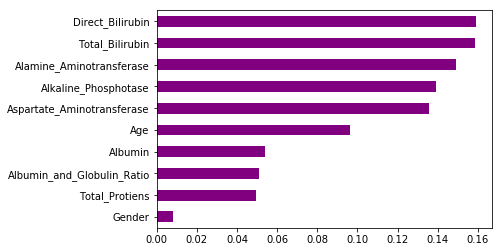

In [29]:
#To  find importance of variable
importances_rf = pd.Series(rf.feature_importances_,index=x.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf .plot(kind = 'barh',color = 'purple')